<a href="https://colab.research.google.com/github/SosaGabriel/DataScience/blob/main/Telecom_Data_Analysis_and_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align=center>
<img src="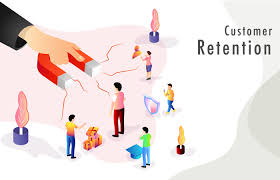 " width="60%"></p>

Cualquier empresa quiere maximizar el número de clientes. Para lograr este objetivo, es importante no solo tratar de atraer nuevos, sino también retener los existentes. **Retener a un cliente le costará a la empresa menos que atraer uno nuevo**. Además, un nuevo cliente puede estar débilmente interesado en los servicios empresariales y será difícil trabajar con él, mientras que los antiguos clientes ya tienen los datos necesarios sobre la interacción con el servicio.

En consecuencia, **prediciendo la deserción, podemos reaccionar a tiempo** y tratar de retener al cliente que quiere irse. En base a los datos sobre los servicios que utiliza el cliente, podemos hacerle una oferta especial, intentando cambiar su decisión de dejar el operador. Esto hará que la tarea de retención sea más fácil de implementar que la tarea de atraer nuevos usuarios, de los que aún no sabemos nada.

Se le proporciona un conjunto de datos de una empresa de telecomunicaciones. Los datos contienen información sobre casi seis mil usuarios, sus características demográficas, los servicios que utilizan, la duración del uso de los servicios del operador, el método de pago y el monto del pago.

La tarea consiste en analizar los datos y predecir la rotación de usuarios (para identificar a las personas que renovarán y no renovarán su contrato). El trabajo debe incluir los siguientes elementos obligatorios:

Descripción de los datos (con el cálculo de estadísticas básicas);
Investigación de dependencias y formulación de hipótesis;
Construir modelos para predecir el flujo de salida (con justificación para la elección de un modelo en particular) basados ​​en hipótesis probadas y relaciones identificadas;
Comparación de la calidad de los modelos obtenidos. 


Acerca de este archivo  
ID de cliente - ID de cliente  
sexo - sexo del cliente (hombre / mujer)  
SeniorCitizen - es el cliente jubilado (1, 0)  
Socio - es el cliente casado (Sí, No)  
tenencia - cuántos meses ha sido cliente de la empresa  
PhoneService - ¿Está conectado el servicio telefónico (Sí, No)?  
Varias líneas - ¿Hay varias líneas telefónicas conectadas (Sí, No, Sin servicio telefónico)?  
InternetService - el proveedor de servicios de Internet del cliente (DSL, fibra óptica, No)  
OnlineSecurity - es el servicio de seguridad en línea conectado ( Sí, No, Sin servicio de Internet)  
Copia de seguridad en línea: si el servicio de respaldo en línea está activado (Sí, No, Sin servicio de Internet)  
Protección del dispositivo: ¿el cliente tiene seguro de equipo (Sí, No, Sin servicio de Internet)  
TechSupport: ¿está conectado el servicio de soporte técnico (Sí, No, No hay servicio de Internet)?  
StreamingTV: está conectado el servicio de transmisión de TV (Sí, No, No hay servicio de Internet)  
StreamingMovies: está el servicio de transmisión de cine activado (Sí, No, No hay servicio de Internet )
Contrato: tipo de contrato con el cliente (mes a mes, un año, dos años)  
Facturación
electrónica : si el cliente utiliza facturación electrónica (Sí, No)  
Método de pago: método de pago (cheque electrónico, cheque enviado por correo, transferencia bancaria (automática), Tarjeta de crédito (automática))  
MonthlyCharges: pago mensual actual  
TotalCharges: el monto total que el cliente pagó por los servicios durante todo el tiempo  
Churn: si hubo un churn (Sí o No)   
https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving telecom_users.csv to telecom_users.csv


In [ ]:
data = pd.read_csv('/content/telecom_users.csv')

In [ ]:
print("Data: \t\nVarialbes: \t{}\nEntradas:\t{}".format(data.shape[1],data.shape[0]))

Data: 	
Varialbes: 	22
Entradas:	5986


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [ ]:
print("Variables Numéricas:")
for i in data.select_dtypes(exclude = ['object']):
    print("\t\t"+i)
    

print("Variables con Texto:")
for i in data.select_dtypes(include = ['object']):
    print("\t\t"+i)
    

print("Variables con Nulos")
missing_val_count = (data.isnull().sum())
print(missing_val_count[missing_val_count > 0])

Variables Numéricas:
		Unnamed: 0
		SeniorCitizen
		tenure
		MonthlyCharges
Variables con Texto:
		customerID
		gender
		Partner
		Dependents
		PhoneService
		MultipleLines
		InternetService
		OnlineSecurity
		OnlineBackup
		DeviceProtection
		TechSupport
		StreamingTV
		StreamingMovies
		Contract
		PaperlessBilling
		PaymentMethod
		TotalCharges
		Churn
Variables con Nulos
Series([], dtype: int64)


In [ ]:
categorical_columns = [cname for cname in data.columns if data[cname].dtype == "object"]
categorical_columns

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [ ]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


Los datos no tienen variables nulas, SITUción que no siempre pasa en la vida real ;)  
No necesitamos algunas de estas columnas tanto en el análisis de datos como en los enfoques de predicción.  
Además, 'Sí' y 'No' no es ideal para tener un modelo de clasificación, así que los cambiamos a   
1 = 'Sí'   
0 = 'No'  


In [ ]:
data2=data.copy()

Eliminamos las columnas -> Unnamed: 0, customerID  
Reemplazamos   
1 = 'Sí'
0 = 'No'

In [ ]:
data2 = data2.drop(['Unnamed: 0', 'customerID'], axis=1)
data2 = data2.replace('No', 0)
data2 = data2.replace('Yes', 1)
data2 = data2.replace('No internet service', 0)

In [ ]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,1,1,72,1,1,0,0,0,0,0,0,0,Two year,0,Credit card (automatic),24.10,1734.65,0
1,Female,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,0
2,Female,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,Male,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.5,0
4,Male,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.5,0


# **Exploramos las columnas/campos/atributos**

In [ ]:
data2['InternetService'].value_counts()

Fiber optic    2627
DSL            2068
0              1291
Name: InternetService, dtype: int64

In [ ]:
data2['InternetService'] = data2['InternetService'].replace('Fiber optic', 2)
data2['InternetService'] = data2['InternetService'].replace('DSL', 1)


In [ ]:
data2['InternetService'].value_counts()

2    2627
1    2068
0    1291
Name: InternetService, dtype: int64

In [ ]:
data2['Contract'].value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

In [ ]:
data2['Contract'] = data2['Contract'].replace('Month-to-month', 1)
data2['Contract'] = data2['Contract'].replace('Two year', 24)
data2['Contract'] = data2['Contract'].replace('One year', 12)

In [ ]:
data2['Contract'].value_counts()

1     3269
24    1441
12    1276
Name: Contract, dtype: int64

In [ ]:
data2['PaymentMethod'].value_counts()

Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: PaymentMethod, dtype: int64

In [ ]:
data2['PaymentMethod'] = data2['PaymentMethod'].replace('Electronic check', 1)
data2['PaymentMethod'] = data2['PaymentMethod'].replace('Mailed check', 2)
data2['PaymentMethod'] = data2['PaymentMethod'].replace('Bank transfer (automatic)', 3)
data2['PaymentMethod'] = data2['PaymentMethod'].replace('Credit card (automatic)', 4)

#data2['MultipleLines'] = data2['MultipleLines'].replace('No phone service', 0)

In [ ]:
data2['PaymentMethod'].value_counts()

1    2006
2    1369
3    1308
4    1303
Name: PaymentMethod, dtype: int64

In [ ]:
data2['MultipleLines'].value_counts()

0                   2848
1                   2548
No phone service     590
Name: MultipleLines, dtype: int64

In [ ]:
data2['MultipleLines'] = data2['MultipleLines'].replace('No phone service', 0)

In [ ]:
data2['MultipleLines'].value_counts()

0    3438
1    2548
Name: MultipleLines, dtype: int64

In [ ]:
data2['gender'] = data2['gender'].replace('Male', 1)
data2['gender'] = data2['gender'].replace('Female', 0)

In [ ]:
data2['gender'].value_counts()

1    3050
0    2936
Name: gender, dtype: int64

El objetivo para este dataset es transformar todos los atributos a "int"

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   int64  
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   int64  
 3   Dependents        5986 non-null   int64  
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   int64  
 6   MultipleLines     5986 non-null   int64  
 7   InternetService   5986 non-null   int64  
 8   OnlineSecurity    5986 non-null   int64  
 9   OnlineBackup      5986 non-null   int64  
 10  DeviceProtection  5986 non-null   int64  
 11  TechSupport       5986 non-null   int64  
 12  StreamingTV       5986 non-null   int64  
 13  StreamingMovies   5986 non-null   int64  
 14  Contract          5986 non-null   int64  
 15  PaperlessBilling  5986 non-null   int64  
 16  PaymentMethod     5986 non-null   int64  


17  MonthlyCharges    5986 non-null   float64  
18  TotalCharges      5986 non-null   object    

In [ ]:
data2['MonthlyCharges']=data2['MonthlyCharges'].astype(int)

In [ ]:
data2['TotalCharges'] = data2['TotalCharges'].astype(str)
data2['TotalCharges'] = data2['TotalCharges'].replace(' ', 0)
data2['TotalCharges'] = data2['TotalCharges'].astype(float)
total_charge = data2['TotalCharges']

In [ ]:
for i in range(0, len(data2)-1):
    total_charge[i] = int(total_charge[i])
data2['TotalCharges'] = data2['TotalCharges'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            5986 non-null   int64
 1   SeniorCitizen     5986 non-null   int64
 2   Partner           5986 non-null   int64
 3   Dependents        5986 non-null   int64
 4   tenure            5986 non-null   int64
 5   PhoneService      5986 non-null   int64
 6   MultipleLines     5986 non-null   int64
 7   InternetService   5986 non-null   int64
 8   OnlineSecurity    5986 non-null   int64
 9   OnlineBackup      5986 non-null   int64
 10  DeviceProtection  5986 non-null   int64
 11  TechSupport       5986 non-null   int64
 12  StreamingTV       5986 non-null   int64
 13  StreamingMovies   5986 non-null   int64
 14  Contract          5986 non-null   int64
 15  PaperlessBilling  5986 non-null   int64
 16  PaymentMethod     5986 non-null   int64
 17  MonthlyCharges    5986 non-null  

Paso 1: Todas las columnas en formato int

Descripción de los datos (con el cálculo de estadísticas básicas)  
Investigación de dependencias y formulación de hipótesis  
Construir modelos para predecir el flujo de salida (con justificación para la elección de un modelo en particular) basados ​​en hipótesis probadas y relaciones identificadas  
Comparación de la calidad de los modelos obtenidos.  

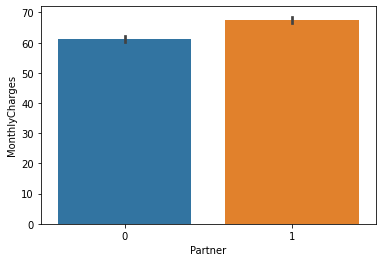

In [ ]:
sns.barplot(x='Partner', y='MonthlyCharges', data=data2)
#Partner - is the client married (Yes, No)

Text(0, 0.5, 'Ch')

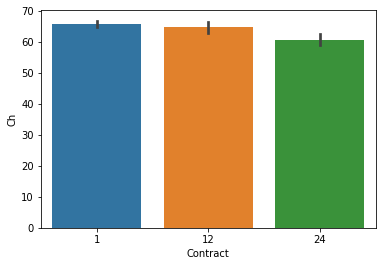

In [ ]:
sns.barplot(x='Contract', y='MonthlyCharges', data=data2)
plt.ylabel('Charges')
#Contract - type of customer contract
#MonthlyCharges - current monthly payment


Text(0.5, 0, 'Non senior - Senior')

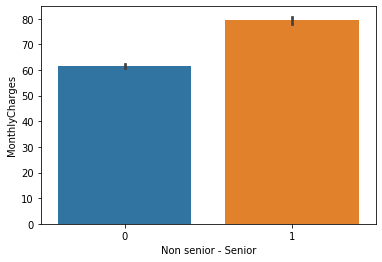

In [ ]:
sns.barplot(x='SeniorCitizen', y='MonthlyCharges', data=data2)
plt.xlabel('Non senior - Senior')
#SeniorCitizen - is the client retired (1, 0)

Text(0.5, 0, 'No Internet - DSL - Fiber optic')

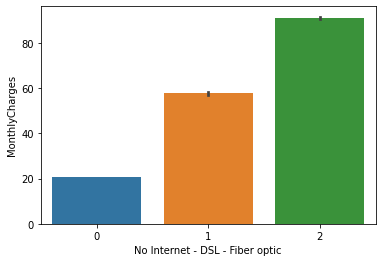

In [ ]:
sns.barplot(x='InternetService', y='MonthlyCharges', data=data2)
plt.xlabel('No Internet - DSL - Fiber optic')
# Fiber optic 2
# DSL 1
# No Internet 0

Tener pareja o no, no afecta tanto los cargos mensuales, el efecto es mínimo.  
El año del contrato afecta los costos mensuales. El contrato de mayor duración tiene los precios más bajos debido al compromiso del cliente.  
Las personas mayores pagan más que las personas que no son mayores. Eso podría deberse a que las personas más jóvenes usan más Internet, por lo que sus contratos tienen un mayor rendimiento.  
La fibra óptica es la Internet más rápida y confiable en este momento. No es de extrañar que sea el más caro.  

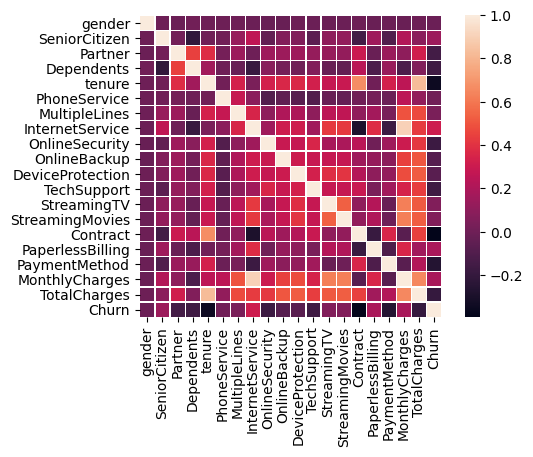

In [ ]:
plt.figure(dpi=100)
sns.heatmap(data2.corr(), square = True, linewidths= .2, annot=False, fmt='.2g');
plt.show()

Seleccionaremos los más correlacionados para el modelo.

In [ ]:
data2[abs(data2['Churn']) > 0.1].index

Int64Index([   2,   11,   18,   19,   23,   24,   26,   28,   43,   44,
            ...
            5947, 5952, 5953, 5957, 5962, 5973, 5976, 5980, 5981, 5984],
           dtype='int64', length=1587)

In [ ]:
data2.corr()[abs(data2.corr()['Churn']) > 0.1].index

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data3=data2 [['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [ ]:
data3.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   SeniorCitizen     5986 non-null   int64
 1   Partner           5986 non-null   int64
 2   Dependents        5986 non-null   int64
 3   tenure            5986 non-null   int64
 4   InternetService   5986 non-null   int64
 5   OnlineSecurity    5986 non-null   int64
 6   TechSupport       5986 non-null   int64
 7   Contract          5986 non-null   int64
 8   PaperlessBilling  5986 non-null   int64
 9   PaymentMethod     5986 non-null   int64
 10  MonthlyCharges    5986 non-null   int64
 11  TotalCharges      5986 non-null   int64
 12  Churn             5986 non-null   int64
dtypes: int64(13)
memory usage: 608.1 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
x = data3.drop(['Churn'], axis=1)
y = data3['Churn']

In [ ]:
x.shape, y.shape

((5986, 12), (5986,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((4788, 12), (1198, 12))

In [ ]:
y_train.shape, y_test.shape

((4788,), (1198,))

Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
prediction_lreg = reg.predict(x_test)

#print(classification_report(y_test,prediction_lreg))
#metrics.plot_roc_curve(reg, x_test, y_test)

Para terminar: el problema es que está aplicando una métrica (precisión) que es inapropiada para su modelo ( LinearRegression): si está en una configuración de clasificación, debe cambiar su modelo (por ejemplo, usar LogisticRegressionen su lugar); si se encuentra en una configuración de regresión (es decir, predicción numérica), debe cambiar la métrica

Regresion Logistica

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       895
           1       0.58      0.56      0.57       303

    accuracy                           0.79      1198
   macro avg       0.72      0.71      0.72      1198
weighted avg       0.79      0.79      0.79      1198



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


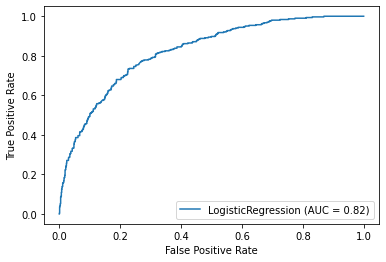

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
prediction_lr = logistic.predict(x_test)
print(classification_report(y_test,prediction_lr))
metrics.plot_roc_curve(logistic, x_test, y_test)

DECISION TREE

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       895
           1       0.47      0.50      0.48       303

    accuracy                           0.73      1198
   macro avg       0.65      0.65      0.65      1198
weighted avg       0.74      0.73      0.73      1198



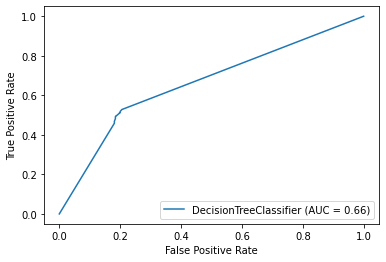

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
prediction_dt = tree.predict(x_test)
print(classification_report(y_test, prediction_dt))
metrics.plot_roc_curve(tree, x_test, y_test)

RANDOM FOREST

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       895
           1       0.57      0.47      0.52       303

    accuracy                           0.78      1198
   macro avg       0.70      0.68      0.69      1198
weighted avg       0.77      0.78      0.77      1198



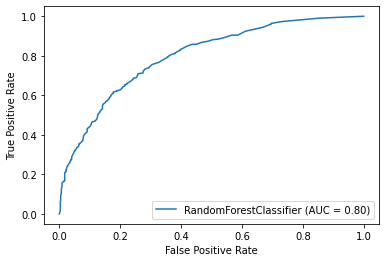

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
prediction_rf = forest.predict(x_test)
print(classification_report(y_test, prediction_rf))
metrics.plot_roc_curve(forest, x_test, y_test) 

# **▶️ Hasta este punto logramos alrededor de un 80% de precisión con varios modelos ⬆️**⬆️